# Exploratory Data Analysis (EDA) of Prudential Life Insurance Sample Data

In [1]:
# Import necessary libraries.
import pandas as pd
import numpy as np
import pandas_profiling as pdp
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Read data source csv files.
data=pd.read_csv('data/prudential_life_insurance_sample_data.csv')

In [3]:
# Read header of dataframe.
data.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


Data Fields Description
* Id, A unique identifier associated with an application.
* Product_Info_1-7, A set of normalized variables relating to the product applied for
* Ins_Age, Normalized age of applicant
* Ht, Normalized height of applicant
* Wt, Normalized weight of applicant
* BMI, Normalized BMI of applicant
* Employment_Info_1-6, A set of normalized variables relating to the employment history of the applicant.
* InsuredInfo_1-6, A set of normalized variables providing information about the applicant.
* Insurance_History_1-9, A set of normalized variables relating to the insurance history of the applicant.
* Family_Hist_1-5, A set of normalized variables relating to the family history of the applicant.
* Medical_History_1-41, A set of normalized variables relating to the medical history of the applicant.
* Medical_Keyword_1-48, A set of dummy variables relating to the presence of/absence of a medical keyword being associated with the application.
* Response, This is the target variable, an ordinal variable relating to the final decision associated with an application

In [4]:
# Check dataframe information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 128 entries, Id to Response
dtypes: float64(18), int64(109), object(1)
memory usage: 58.0+ MB


# Missing Value Analysis

In [5]:
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return tt

In [6]:
# Check missing value percentage in dataframe
missing_data(data)['Percent'].sort_values(ascending=False)

Medical_History_10    99.061990
Medical_History_32    98.135767
Medical_History_24    93.598963
Medical_History_15    75.101463
Family_Hist_5         70.411411
                        ...    
Medical_History_6      0.000000
Medical_History_5      0.000000
Medical_History_4      0.000000
Medical_History_3      0.000000
Response               0.000000
Name: Percent, Length: 128, dtype: float64

In [7]:
# Drop columns which has more than 75% missing value.
data=data[data.columns[data.isnull().mean() <= 0.75]]

In [8]:
# Count missing value in columns.
data.isnull().sum().sort_values(ascending=False)

Family_Hist_5          41811
Family_Hist_3          34241
Family_Hist_2          28656
Insurance_History_5    25396
Family_Hist_4          19184
                       ...  
Medical_History_6          0
Medical_History_5          0
Medical_History_4          0
Medical_History_3          0
Response                   0
Length: 124, dtype: int64

In [9]:
# Take null value columns name.
list_data=data.columns[data.isna().any()].tolist()

In [10]:
# Print columns name and data types which has null values.
for i in range(0,len(list_data)):
    print('column name: ',list_data[i],' Dtype:',data[list_data[i]].dtypes)

column name:  Employment_Info_1  Dtype: float64
column name:  Employment_Info_4  Dtype: float64
column name:  Employment_Info_6  Dtype: float64
column name:  Insurance_History_5  Dtype: float64
column name:  Family_Hist_2  Dtype: float64
column name:  Family_Hist_3  Dtype: float64
column name:  Family_Hist_4  Dtype: float64
column name:  Family_Hist_5  Dtype: float64
column name:  Medical_History_1  Dtype: float64


In [11]:
# Fill Null Values With Mean.
for column in list_data:
    data[column].fillna(data[column].mean(), inplace=True)

In [12]:
# Check dataframe information.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Columns: 124 entries, Id to Response
dtypes: float64(14), int64(109), object(1)
memory usage: 56.2+ MB


In [13]:
# Label Encoding
from sklearn.preprocessing import LabelEncoder

obj_data=list(data.select_dtypes(include=['object']).columns)
le=LabelEncoder()
data[obj_data]=le.fit_transform(data[obj_data])

C:\Users\easonlai\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


Analysing features

C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Wt', ylabel='Density'>

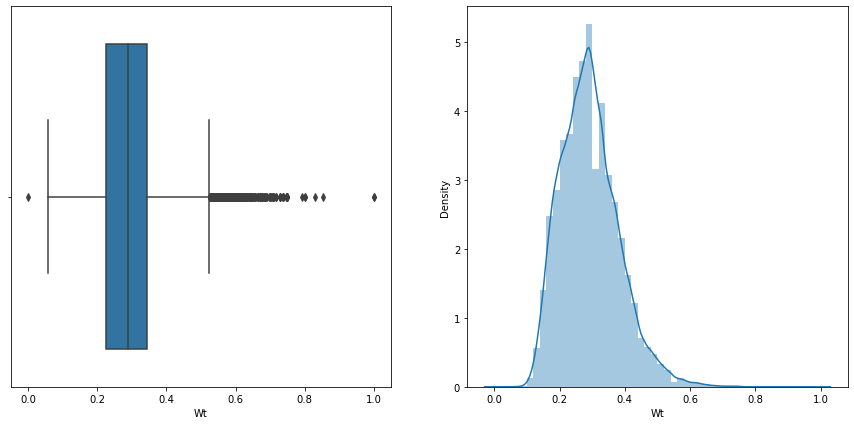

In [14]:
# Weight
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Wt', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['Wt'],  ax=axes[1])

C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ht', ylabel='Density'>

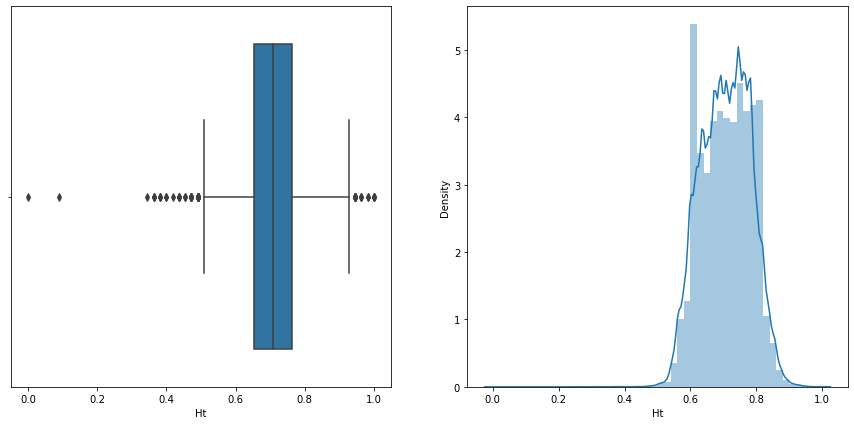

In [15]:
# Height
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'Ht', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['Ht'],  ax=axes[1])

C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='BMI', ylabel='Density'>

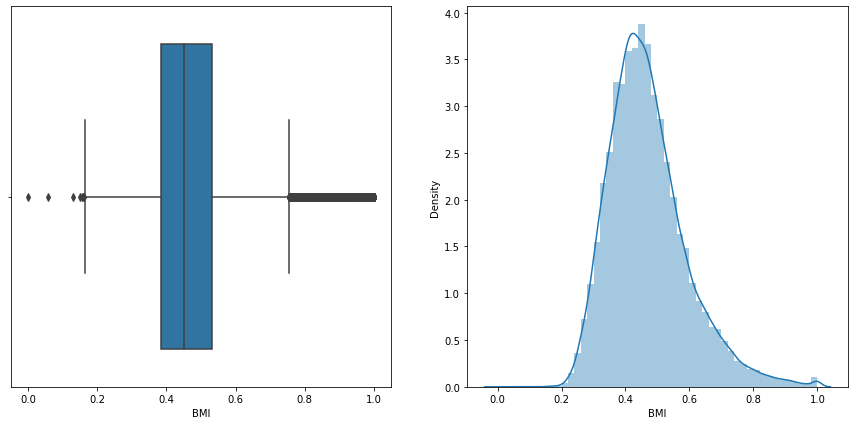

In [16]:
# BMI
f, axes = plt.subplots(1, 2, figsize=(15,7))
sns.boxplot(x = 'BMI', data=data,  orient='v' , ax=axes[0])
sns.distplot(data['BMI'],  ax=axes[1])

C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\_core.py:1319: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Ins_Age', ylabel='Density'>

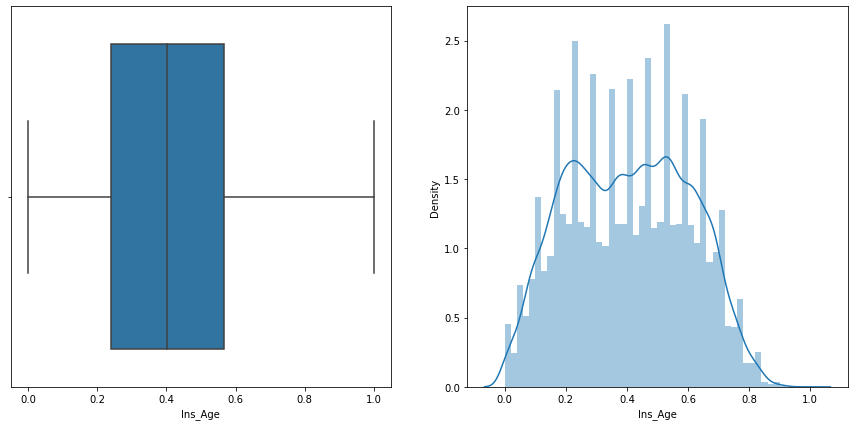

In [17]:
# Age
f,axes=plt.subplots(1,2,figsize=(15,7))
sns.boxplot(x='Ins_Age',data=data,orient='v',ax=axes[0])
sns.distplot(data['Ins_Age'],ax=axes[1])

# Target Variable Analysis

C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


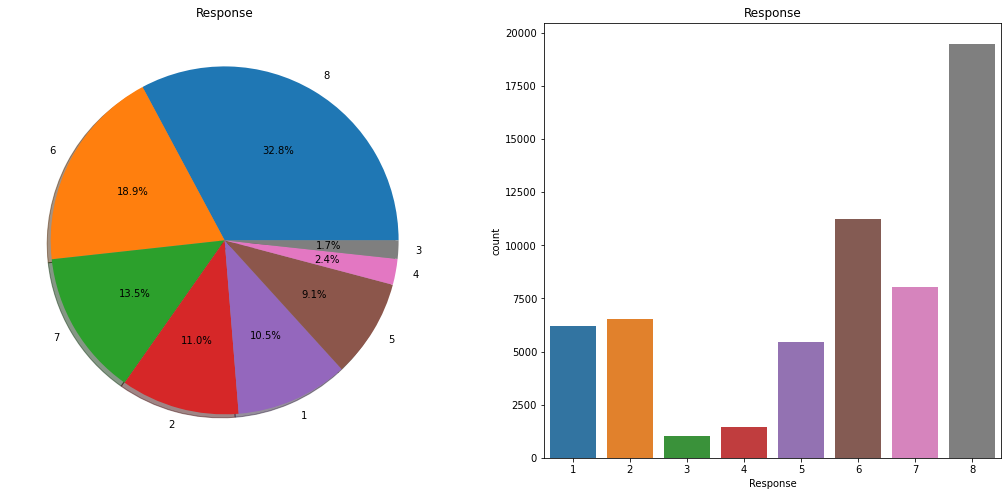

In [18]:
f,ax=plt.subplots(1,2,figsize=(18,8))
data['Response'].value_counts().plot.pie(autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('Response')
ax[0].set_ylabel('')
sns.countplot('Response',data=data,ax=ax[1])
ax[1].set_title('Response')
plt.show()

In [19]:
# Make 0 to 7 as one class and 8 as another class.
# Create a function to create a new target variable based on conditions.
def new_target(row):
    if (row['Response']<=7) & (row['Response']>=0):
        val=0
    elif (row['Response']==8):
        val=1
    else:
        val=-1
    return val

In [20]:
# Create a copy of original dataframe.
new_data=data.copy()

In [21]:
# Create a new column.
new_data['Final_Response']=new_data.apply(new_target,axis=1)

In [22]:
new_data['Final_Response'].value_counts()

0    39892
1    19489
Name: Final_Response, dtype: int64

Text(0.5, 1.0, 'Distribution of rows by response categories')

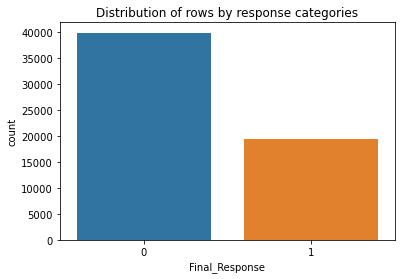

In [23]:
# Distribution plot for target classes
sns.countplot(x=new_data.Final_Response).set_title('Distribution of rows by response categories')

In [24]:
# Drop already existing column.
new_data.drop(['Response'],axis=1,inplace=True)
data=new_data
del new_data

In [25]:
data.rename(columns={'Final_Response':'Response'},inplace=True)

Response = 0 (Life Insurance Policy is not being approved, from class 0-7)

Response = 1 (Life Insurance Policy is approved, from class 8)

# Analysis based on BMI, AGE, HEIGHT and WEIGHT vs Response (0, 1)

In [26]:
# BMI, AGE, HEIGHT and WEIGHT categorization based on their values.
# BMI Categorization
conditions = [
    (data['BMI'] <= data['BMI'].quantile(0.25)),
    (data['BMI'] > data['BMI'].quantile(0.25)) & (data['BMI'] <= data['BMI'].quantile(0.75)),
    (data['BMI'] > data['BMI'].quantile(0.75))]

choices = ['under_weight', 'average', 'overweight']

data['BMI_Wt'] = np.select(conditions, choices)

# Age Categorization
conditions = [
    (data['Ins_Age'] <= data['Ins_Age'].quantile(0.25)),
    (data['Ins_Age'] > data['Ins_Age'].quantile(0.25)) & (data['Ins_Age'] <= data['Ins_Age'].quantile(0.75)),
    (data['Ins_Age'] > data['Ins_Age'].quantile(0.75))]

choices = ['young', 'average', 'old']
data['Old_Young'] = np.select(conditions, choices)

# Height Categorization
conditions = [
    (data['Ht'] <= data['Ht'].quantile(0.25)),
    (data['Ht'] > data['Ht'].quantile(0.25)) & (data['Ht'] <= data['Ht'].quantile(0.75)),
    (data['Ht'] > data['Ht'].quantile(0.75))]

choices = ['short', 'average', 'tall']

data['Short_Tall'] = np.select(conditions, choices)

# Weight Categorization
conditions = [
    (data['Wt'] <= data['Wt'].quantile(0.25)),
    (data['Wt'] > data['Wt'].quantile(0.25)) & (data['Wt'] <= data['Wt'].quantile(0.75)),
    (data['Wt'] > data['Wt'].quantile(0.75))]

choices = ['thin', 'average', 'fat']

data['Thin_Fat'] = np.select(conditions, choices)

<AxesSubplot:xlabel='BMI_Wt', ylabel='count'>

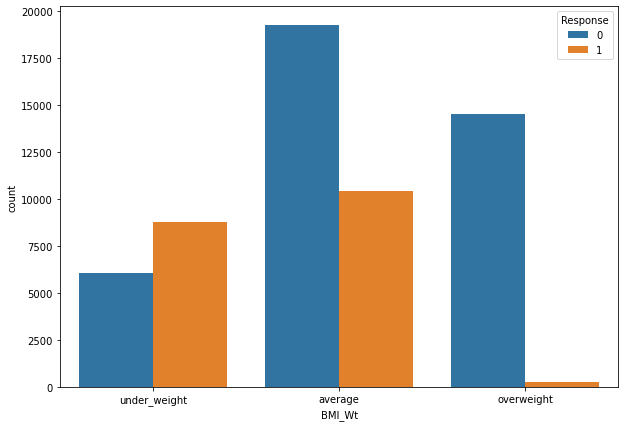

In [32]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'BMI_Wt', hue = 'Response', data = data)

* Overweighted (High BMI) policyholders are not being approved for Life Insurance Policy in most cases.

<AxesSubplot:xlabel='Old_Young', ylabel='count'>

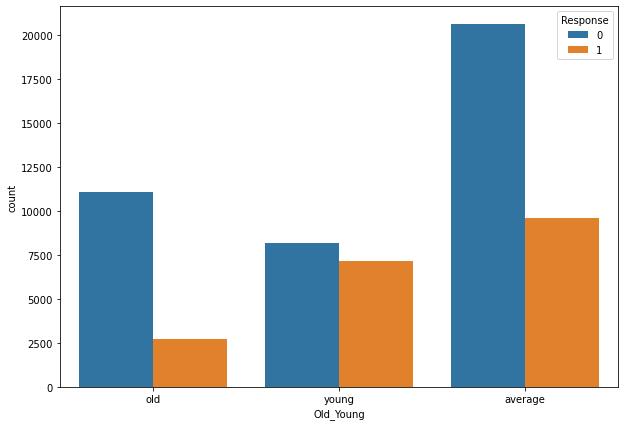

In [28]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Old_Young', hue = 'Response', data = data)

* Old age policyholders are not being approved for Life Insurance Policy in most cases, comparing with Young and Average.

* Average age policyholders are not being approved for Life Insurance Policy in most cases, it's really depends on other factors/feature situation.

<AxesSubplot:xlabel='Short_Tall', ylabel='count'>

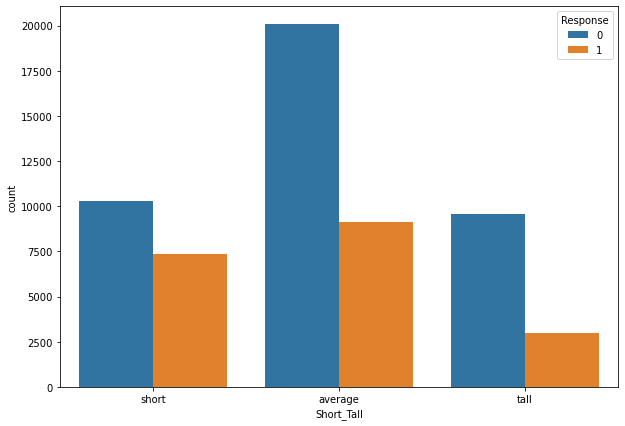

In [29]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Short_Tall', hue = 'Response', data = data)

* Short or Tall did not indicate any insight.

<AxesSubplot:xlabel='Thin_Fat', ylabel='count'>

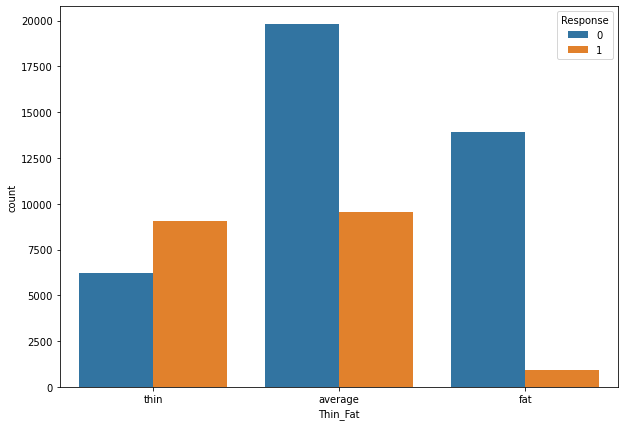

In [30]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'Thin_Fat', hue = 'Response', data = data)

* Similar as Overweighted (High BMI) situation, policyholders are not being approved for Life Insurance Policy in most cases.

Let's based on 3 key factors/features to go deeper analysis.

In [34]:
def new_target(row):
    if (row['BMI_Wt']=='overweight') or (row['Old_Young']=='old')  or (row['Thin_Fat']=='fat'):
        val='extremely_risky'
    else:
        val='not_extremely_risky'
    return val

data['extreme_risk'] = data.apply(new_target,axis=1)

<AxesSubplot:xlabel='extreme_risk', ylabel='count'>

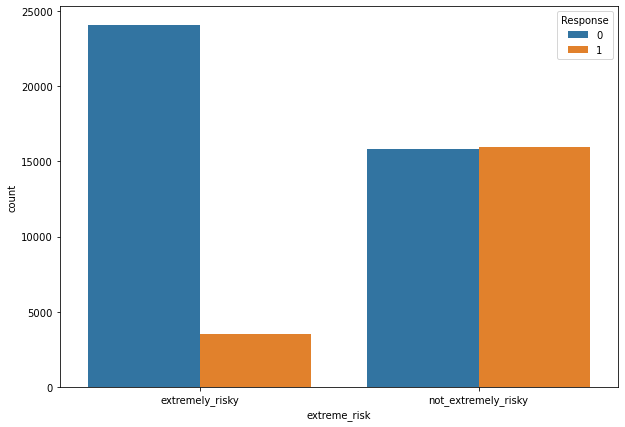

In [36]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'extreme_risk', hue = 'Response', data = data)

* In most cases, policyholders are not being approved for Life Insurance Policy if it's under high risk (High BMI, Old Age, Overweighted).

In [38]:
def new_target(row):
    if (row['BMI_Wt']=='average') or (row['Old_Young']=='average')  or (row['Thin_Fat']=='average'):
        val='average'
    else:
        val='non_average'
    return val

data['average_risk'] = data.apply(new_target,axis=1)

<AxesSubplot:xlabel='average_risk', ylabel='count'>

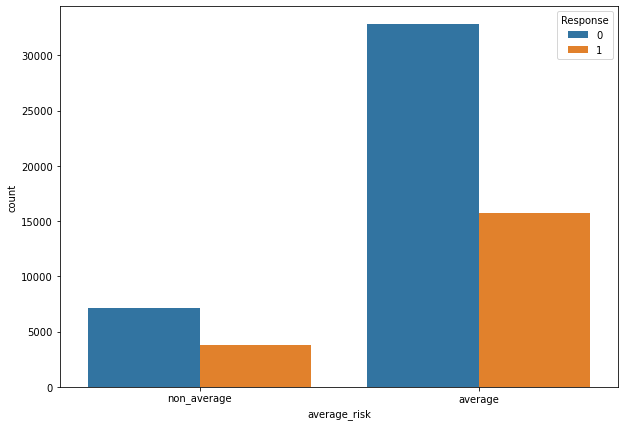

In [40]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'average_risk', hue = 'Response', data = data)

* Average did not indicate any insight.

In [41]:
def new_target(row):
    if (row['BMI_Wt']=='under_weight') or (row['Old_Young']=='young')  or (row['Thin_Fat']=='thin'):
        val='low_end'
    else:
        val='non_low_end'
    return val

data['low_end_risk'] = data.apply(new_target,axis=1)

<AxesSubplot:xlabel='low_end_risk', ylabel='count'>

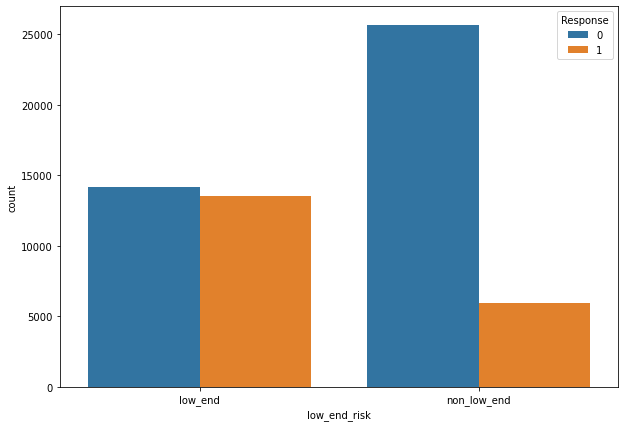

In [42]:
plt.figure(figsize=(10,7))
sns.countplot(x = 'low_end_risk', hue = 'Response', data = data)

* If fall into low_end risk category, approval is nearly 50%. In another angle, if not fall into low_end risk category, higher chance not being approved.

C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_1', ylabel='Density'>

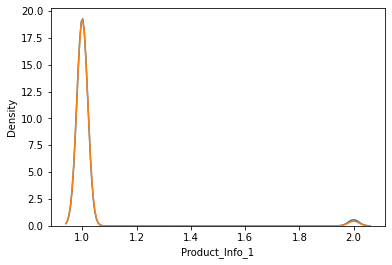

In [46]:
# Discover relationship between Product1 vs Response.
sns.distplot(data[data['Response']==0]['Product_Info_1'],hist=False,label='Rejected') # Blue Line
sns.distplot(data[data['Response']==1]['Product_Info_1'],hist=False,label='Accepted') # Orange Line

C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_2', ylabel='Density'>

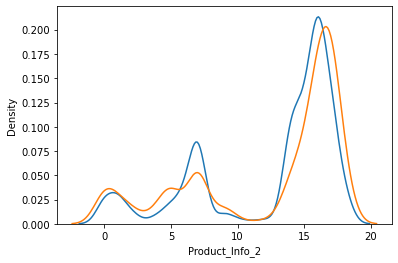

In [48]:
# Discover relationship between Product2 vs Response.
sns.distplot(data[data['Response']==0]['Product_Info_2'],hist=False,label='Rejected')
sns.distplot(data[data['Response']==1]['Product_Info_2'],hist=False,label='Accepted')

C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\easonlai\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Product_Info_3', ylabel='Density'>

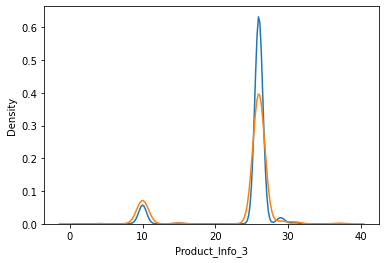

In [49]:
# Discover relationship between Product3 vs Response.
sns.distplot(data[data['Response']==0]['Product_Info_3'],hist=False,label='Rejected')
sns.distplot(data[data['Response']==1]['Product_Info_3'],hist=False,label='Accepted')

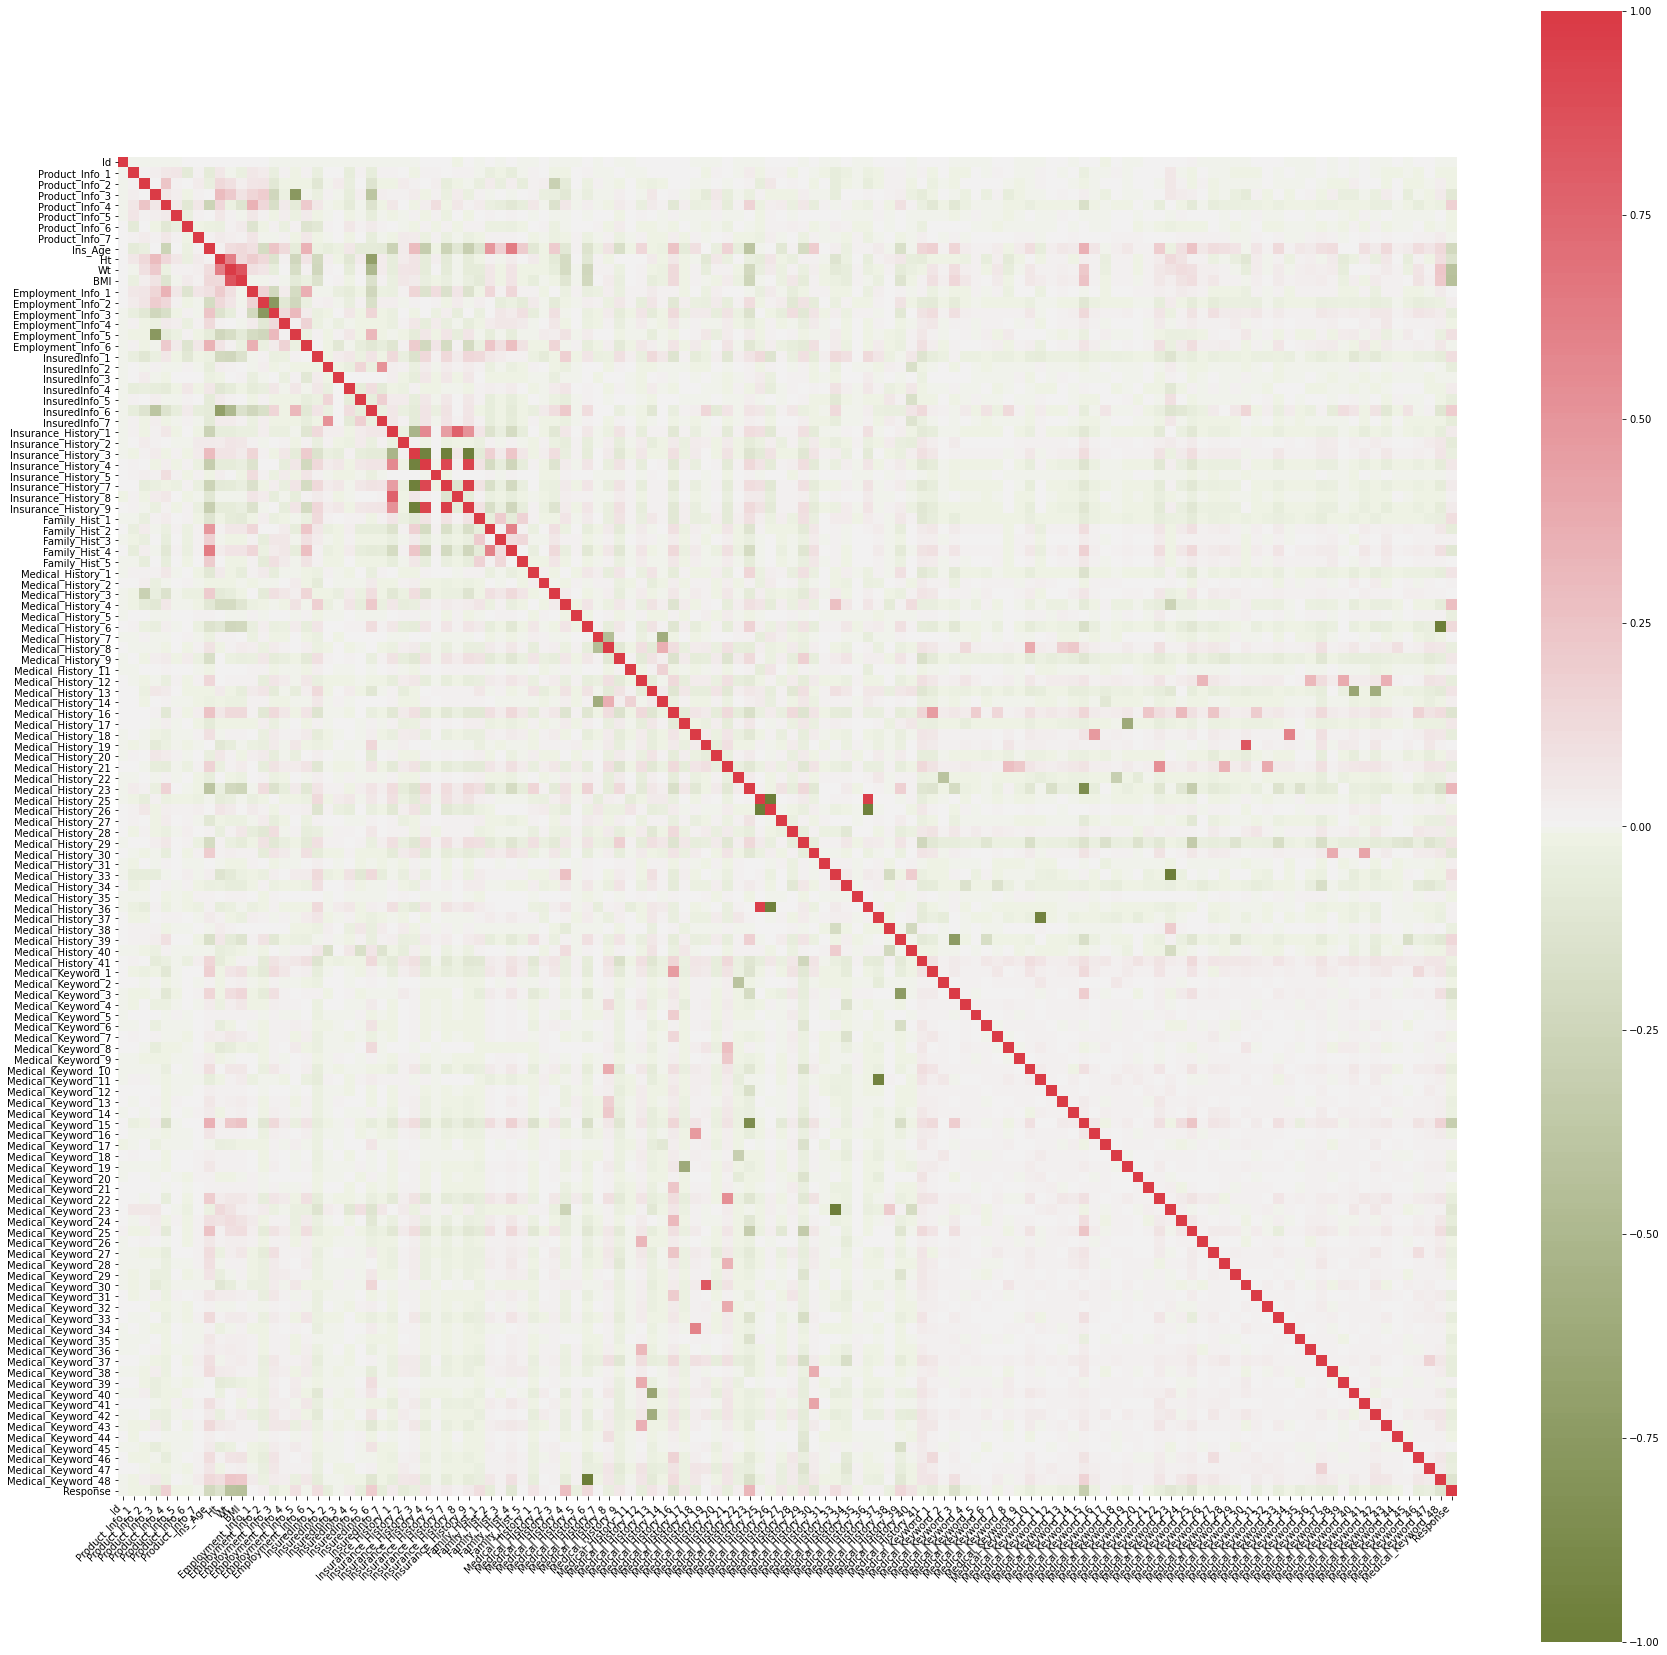

In [56]:
# Print overall heatmap of all columns.
plt.figure(figsize = (30,30))
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(100, 370, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);